In [12]:
!pip install networkx

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

In [14]:
nx.__version__

'2.5'

### Undirected graphs

- Adding and edge from A to C, creates a corresponding edge from C to A

In [15]:
G = nx.Graph()

G

In [16]:
G.add_node('A')

G.nodes

NodeView(('A',))

In [17]:
G.add_nodes_from(['B', 'C', 'D'])

G.nodes

NodeView(('A', 'B', 'C', 'D'))

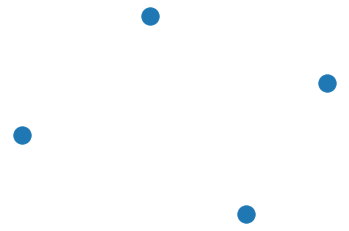

In [18]:
plt.subplots()

nx.draw(G)

In [19]:
def plot_graph(G, node_color, edge_color):
    
    plt.subplots(figsize=(8, 8))
    ax = plt.gca()
    ax.margins(0.20)
    plt.axis("off")

    options = {
        "font_size": 24,
        "with_labels": True,
        "node_size": 1500,
        "node_color": node_color,
        "edgecolors": edge_color,
        "linewidths": 5,
        "width": 5,
    }

    nx.draw_shell(G, **options)

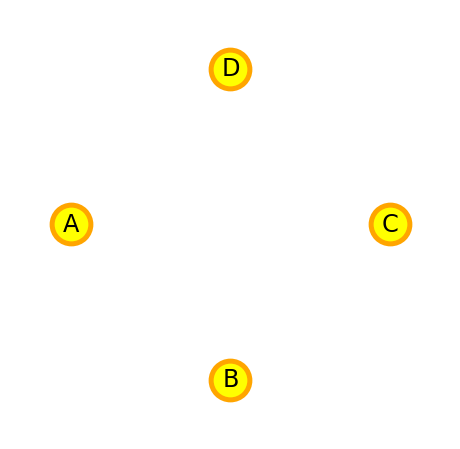

In [20]:
plot_graph(G, "yellow", "orange")

In [21]:
G.add_edge('A', 'B')

G.nodes, G.edges

(NodeView(('A', 'B', 'C', 'D')), EdgeView([('A', 'B')]))

In [22]:
G.add_edge('A', 'B')
G.add_edge('B', 'C')
G.add_edge('D', 'C')
G.add_edge('C', 'A')

G.nodes, G.edges

(NodeView(('A', 'B', 'C', 'D')),
 EdgeView([('A', 'B'), ('A', 'C'), ('B', 'C'), ('C', 'D')]))

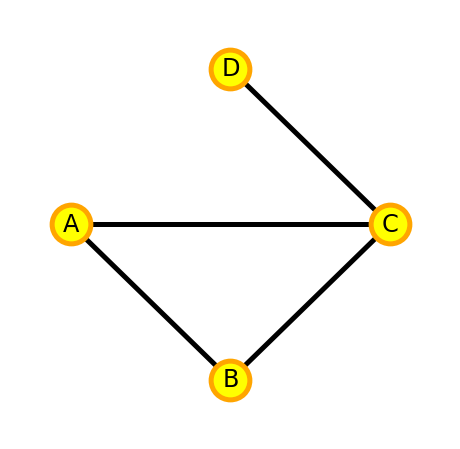

In [23]:
plot_graph(G, "yellow", "orange")

In [24]:
G.number_of_nodes()

4

In [25]:
G.number_of_edges()

4

In [26]:
H = nx.Graph()

H.nodes, H.edges

(NodeView(()), EdgeView([]))

In [27]:
H.add_nodes_from(['W', 'X', 'Y', 'Z'])

H.nodes, H.edges

(NodeView(('W', 'X', 'Y', 'Z')), EdgeView([]))

In [28]:
H.add_edges_from([('W', 'X'), ('W', 'Z'), ('W', 'Y'), ('X', 'Z'), ('X', 'Y')])

H.nodes, H.edges

(NodeView(('W', 'X', 'Y', 'Z')),
 EdgeView([('W', 'X'), ('W', 'Z'), ('W', 'Y'), ('X', 'Z'), ('X', 'Y')]))

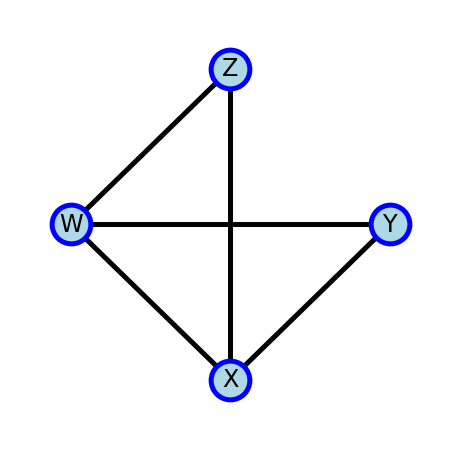

In [29]:
plot_graph(H, 'lightblue', 'blue')

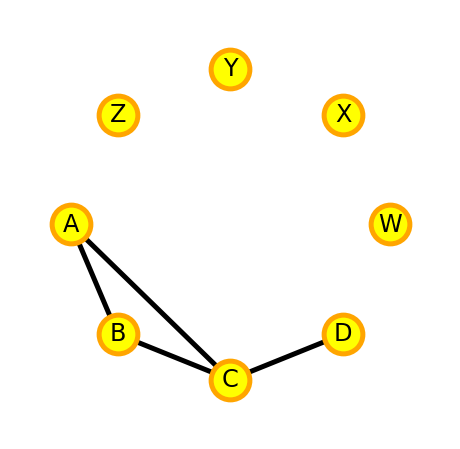

In [30]:
G.add_nodes_from(H.nodes)

plot_graph(G, 'yellow', 'orange')

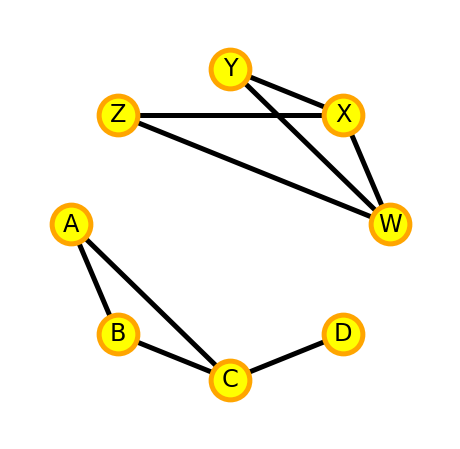

In [31]:
G.add_edges_from(H.edges)

plot_graph(G, 'yellow', 'orange')

### Degree of a node

- in-degree is the number of incoming edges
- out-degree is the number of outgoing edges
- degree is the total of incoming and outgoing nodes
- in an undirected graph in-degree == out-degree == degree

In [32]:
G.degree['D']

1

In [33]:
G.degree['B']

2

In [34]:
G.degree['W']

3

### Adjacent nodes

- node that are directly connected to a node

In [35]:
G.adj['D']

AtlasView({'C': {}})

In [36]:
G.adj['A']

AtlasView({'B': {}, 'C': {}})

In [37]:
G.adj['X']

AtlasView({'W': {}, 'Z': {}, 'Y': {}})

### Adding attributes to graphs, nodes, and edges

In [38]:
G.graph

{}

In [39]:
G.graph['organization'] = 'Phlogistix'

G.graph['num_employees'] = 7

G.graph

{'organization': 'Phlogistix', 'num_employees': 7}

### Adding attributes when adding a new node

Imagine that each node is associated with a city

In [40]:
G.add_node('Q', city='Quebec City')

G.nodes

NodeView(('A', 'B', 'C', 'D', 'W', 'X', 'Y', 'Z', 'Q'))

In [41]:
G.nodes['Q']

{'city': 'Quebec City'}

In [42]:
G.nodes.data()

NodeDataView({'A': {}, 'B': {}, 'C': {}, 'D': {}, 'W': {}, 'X': {}, 'Y': {}, 'Z': {}, 'Q': {'city': 'Quebec City'}})

### Adding attributes to existing nodes

In [43]:
G.nodes['A']['city'] = 'Armstrong'
G.nodes['B']['city'] = 'Barrie'
G.nodes['C']['city'] = 'Cabano'

In [44]:
for data in G.nodes.data():
    print(data)

('A', {'city': 'Armstrong'})
('B', {'city': 'Barrie'})
('C', {'city': 'Cabano'})
('D', {})
('W', {})
('X', {})
('Y', {})
('Z', {})
('Q', {'city': 'Quebec City'})


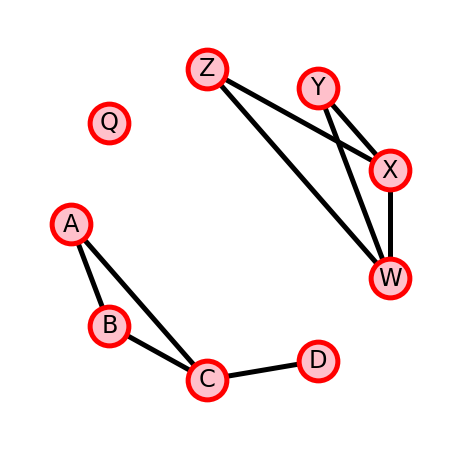

In [45]:
plot_graph(G, 'pink', 'red')

Distance in kilometers

In [46]:
G.add_edge('Q', 'A', distance=245)

G.edges

EdgeView([('A', 'B'), ('A', 'C'), ('A', 'Q'), ('B', 'C'), ('C', 'D'), ('W', 'X'), ('W', 'Z'), ('W', 'Y'), ('X', 'Z'), ('X', 'Y')])

In [47]:
for data in G.edges.data():
    print(data)

('A', 'B', {})
('A', 'C', {})
('A', 'Q', {'distance': 245})
('B', 'C', {})
('C', 'D', {})
('W', 'X', {})
('W', 'Z', {})
('W', 'Y', {})
('X', 'Z', {})
('X', 'Y', {})


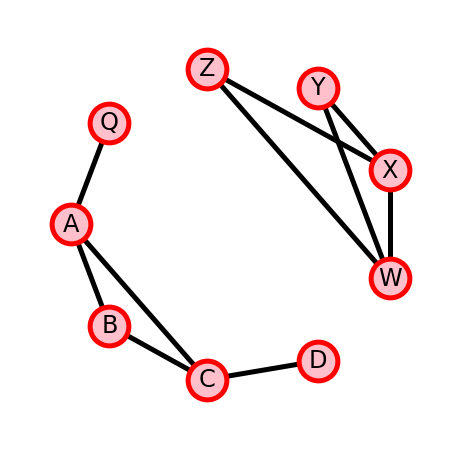

In [48]:
plot_graph(G, 'pink', 'red')

In [49]:
G.edges['A', 'B']['distance'] = 2215
G.edges['B', 'C']['distance'] = 1117

for data in G.edges.data():
    print(data)

('A', 'B', {'distance': 2215})
('A', 'C', {})
('A', 'Q', {'distance': 245})
('B', 'C', {'distance': 1117})
('C', 'D', {})
('W', 'X', {})
('W', 'Z', {})
('W', 'Y', {})
('X', 'Z', {})
('X', 'Y', {})


### Weighted edges

The special attribute weight should be numeric as it is used by algorithms requiring weighted edges.

The time taken to drive between cities can serve as a weight for edges

In [50]:
G.edges['A', 'B']['weight'] = 20
G.edges['B', 'C']['weight'] = 10

for data in G.edges.data():
    print(data)

('A', 'B', {'distance': 2215, 'weight': 20})
('A', 'C', {})
('A', 'Q', {'distance': 245})
('B', 'C', {'distance': 1117, 'weight': 10})
('C', 'D', {})
('W', 'X', {})
('W', 'Z', {})
('W', 'Y', {})
('X', 'Z', {})
('X', 'Y', {})


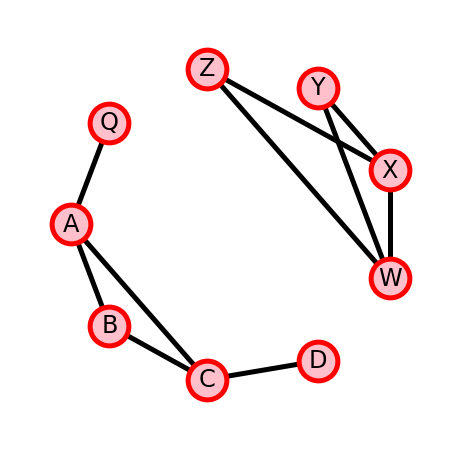

In [51]:
plot_graph(G, 'pink', 'red')

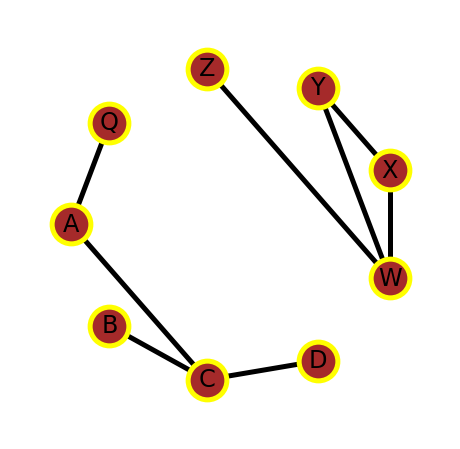

In [52]:
G.remove_edge('Z', 'X')
G.remove_edge('A', 'B')

plot_graph(G, 'brown', 'yellow')